## Introduction

Now that we have been introduced to the different statistical models than are used to represent point processes, we turn to the methods that are used to link observed point patterns back to the process that generated the pattern.

More specifically, the challenge that we face is as follows. Given an observed point pattern, we wish to make inferences about the process that generated the observed pattern. 

The general approach that is used is to construct measures that characterise the observed point pattern, and then compare these against the proporties of the theoretical process models we explored previously.

For example, if we assume that the underlying process is CSR, we know what kinds of properties the empirical patterns from such a process should exhibit. The critical thing to keep in mind is that we never actually see the underlying process - we only see outcomes of the process (i.e., the pattern).

This raises a number of challenges that we will need to address later on, but for now we are going to build up an inituition of the general strategy for analyzing point patterns.



## Example Patterns

To begin we are going to create two different point patterns, one from a CSR process and one from a clustered process.
We will use these two patterns to introduce the different statistical methods used to analyze the patterns.
Here we are in the rare circumstance in which we actually know what process generated the pattern. 

### CSR n=60

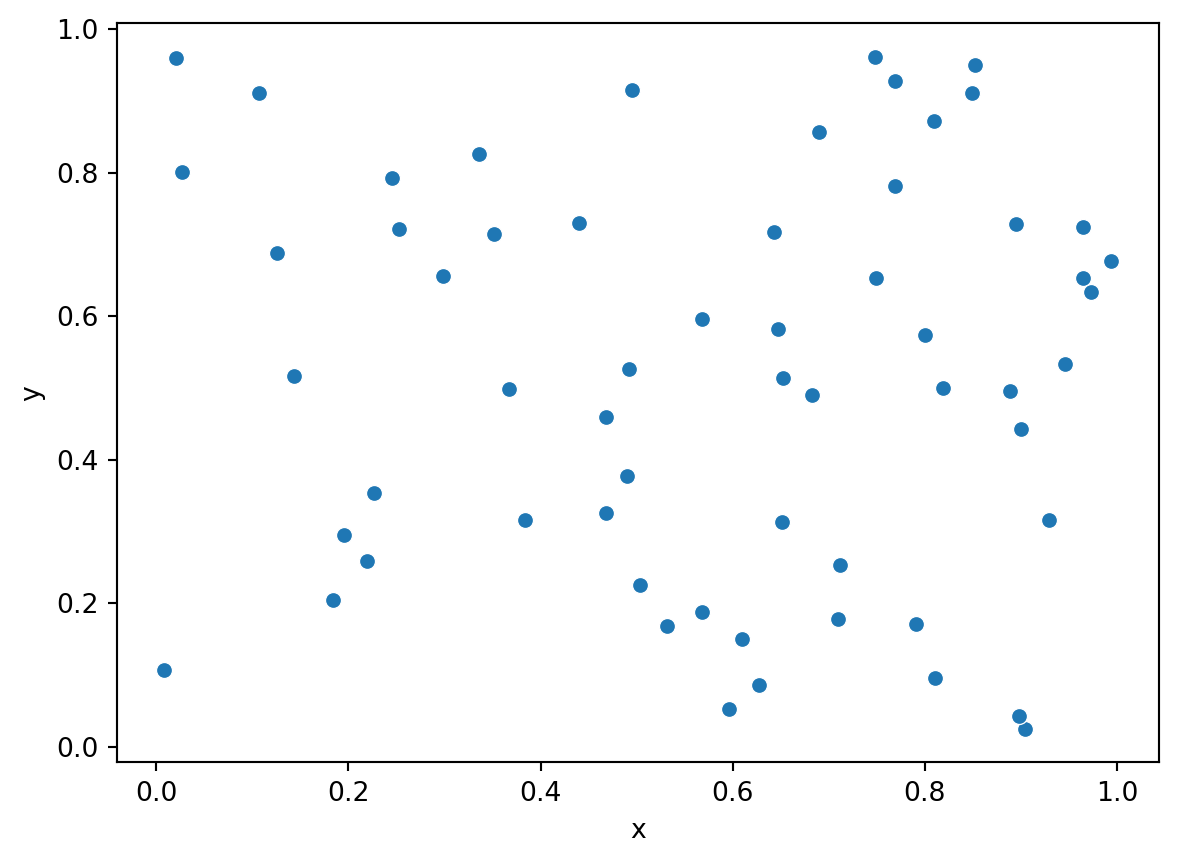

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(12345)
n = 60
xy = np.random.rand(60,2)
df = pd.DataFrame(data=xy, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', data=df);

In [2]:
import pointpats as pp

In [3]:
csr = pp.PointPattern(xy)

In [4]:
csr.summary()

Point Pattern
60 points
Bounding rectangle [(0.00838829794155349,0.024676210429265266), (0.9940145858999619,0.9613067360728214)]
Area of window: 0.9231676681785911
Intensity estimate for window: 64.99361066054225
          x         y
0  0.929616  0.316376
1  0.183919  0.204560
2  0.567725  0.595545
3  0.964515  0.653177
4  0.748907  0.653570


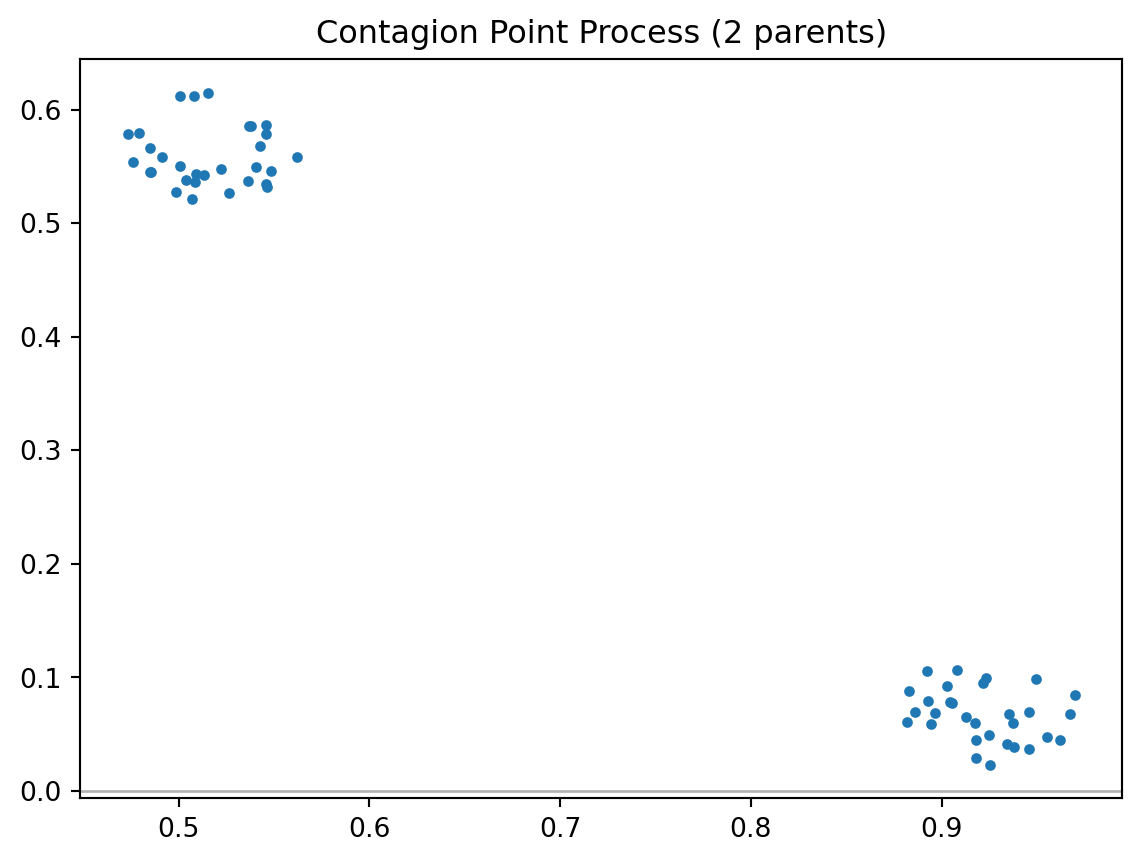

In [5]:
w = pp.Window([(0,0), (0,1), (1,1), (1,0), (0,0)])
draw = pp.PoissonClusterPointProcess(w, n, 2, 0.05, 1, asPP=True, conditioning=False)
draw.realizations[0].plot(window=True, title='Contagion Point Process (2 parents)')

In [6]:
clustered = draw.realizations[0]

In [7]:
clustered.summary()

Point Pattern
60 points
Bounding rectangle [(0.47331760265312733,0.023178703349462502), (0.9696584457277277,0.6150208352748628)]
Area of window: 1.0
Intensity estimate for window: 60.0
          x         y
0  0.513060  0.541971
1  0.473318  0.578385
2  0.508373  0.536200
3  0.881716  0.060328
4  0.894221  0.059273


## Quadrat Statistics

In [8]:
import pointpats.quadrat_statistics as qs

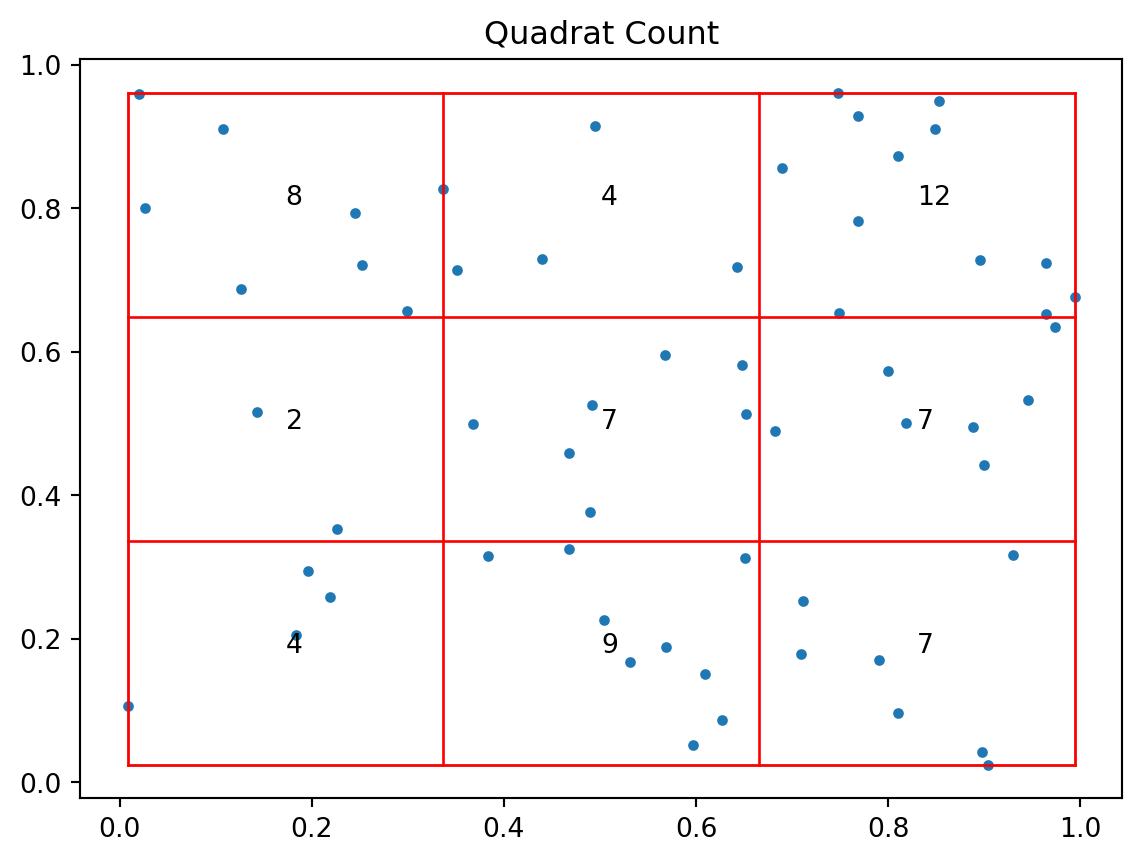

In [9]:
csr_qr = qs.QStatistic(csr, shape='rectangle', nx=3, ny=3)
csr_qr.plot()

In [10]:
csr_qr.chi2

10.8

In [11]:
csr_qr.chi2_pvalue

0.21329101843394052

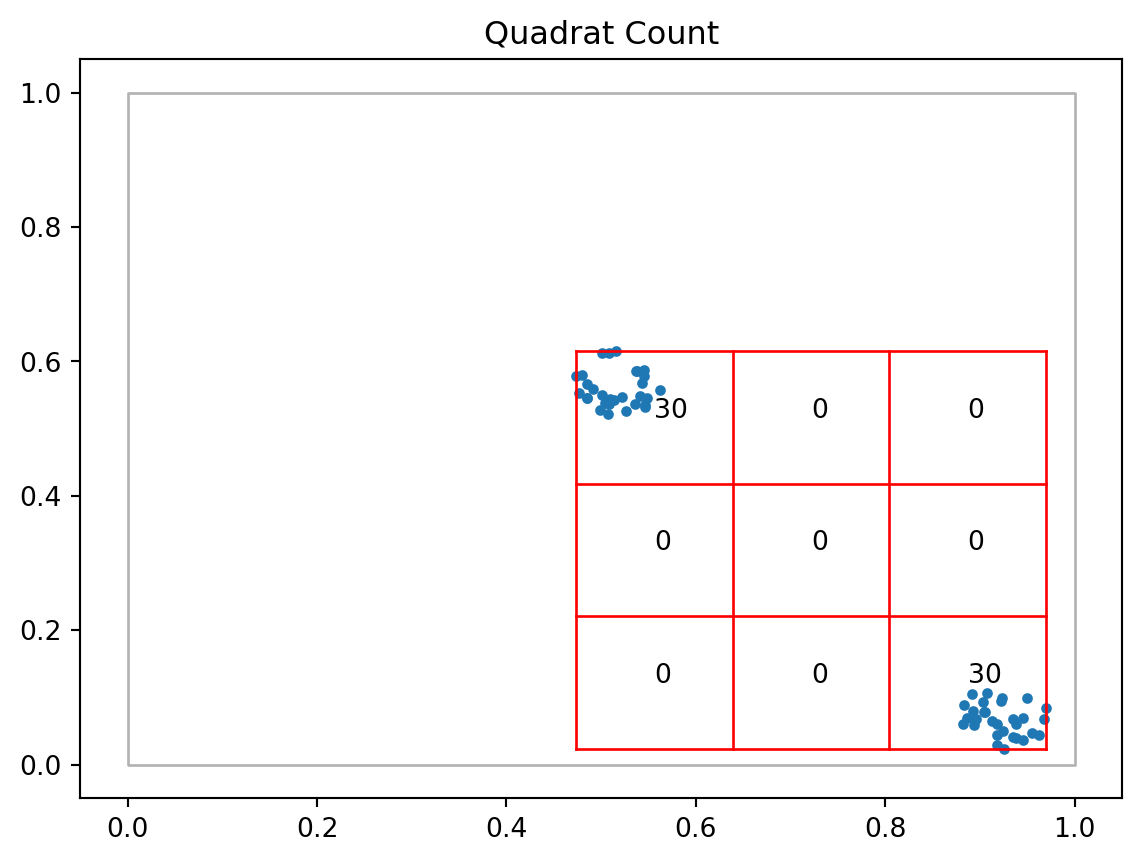

In [12]:
clustered_qr = qs.QStatistic(clustered, shape='rectangle', nx=3, ny=3)
clustered_qr.plot()

In [13]:
clustered_qr.chi2

209.99999999999994

In [14]:
clustered_qr.chi2_pvalue

4.976940117448032e-41

## Quadrat Shape

In [15]:
csr_qr_hex = qs.QStatistic(csr, shape='hexagon', lh=0.2)


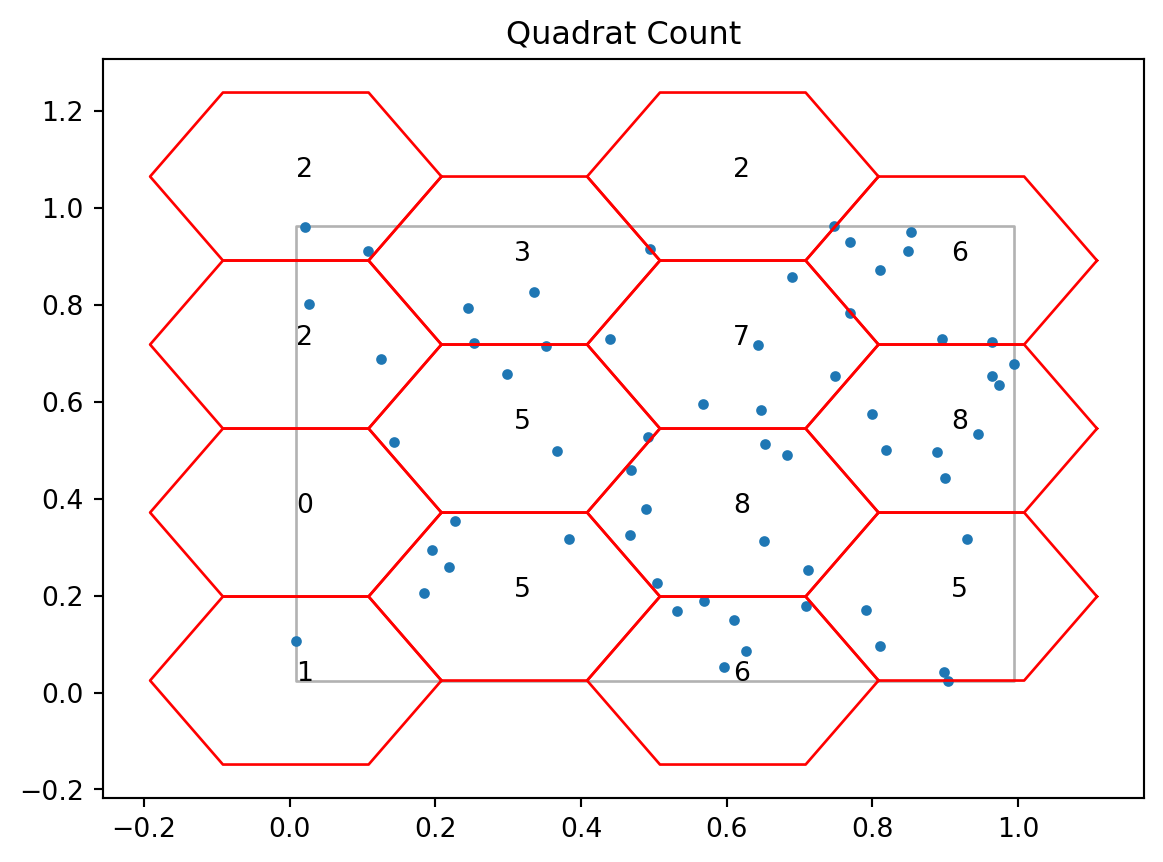

In [16]:
csr_qr_hex.plot()

In [17]:
csr_qr_hex.chi2

20.733333333333334

In [18]:
csr_qr_hex.df

13

In [19]:
csr_qr_hex.chi2_pvalue

0.07837318677184966

In [21]:
clustered_qr_hex = qs.QStatistic(clustered, shape='hexagon', lh=0.2)


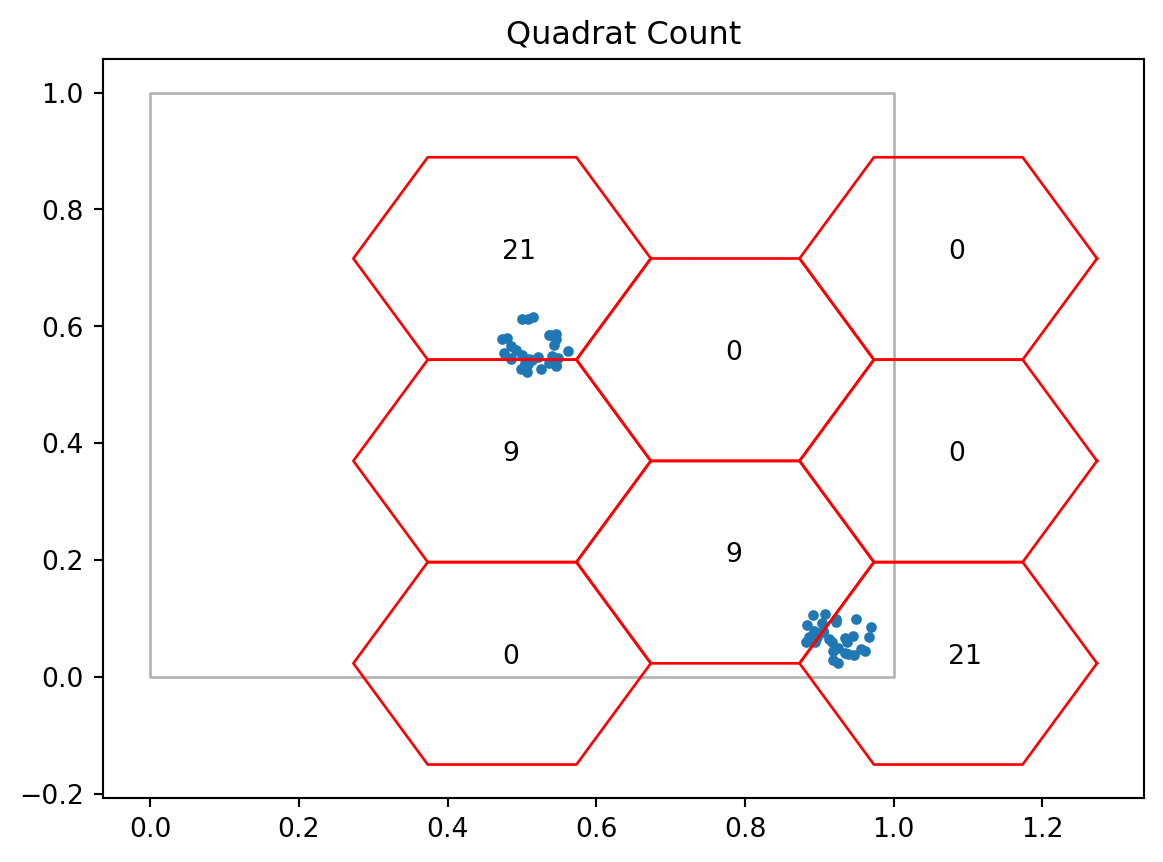

In [22]:
clustered_qr_hex.plot()

In [23]:
clustered_qr_hex.chi2_pvalue

2.0052804321944022e-14

## Simulation Inference

In [24]:
from pointpats import PoissonPointProcess as poissonpp

In [25]:
clustered_sim = poissonpp(clustered.window, clustered.n, 999, asPP=True)

In [26]:
clustered_sim_hex = qs.QStatistic(clustered, shape='hexagon',
                                  lh=0.2,
                                  realizations=clustered_sim)

In [27]:
clustered_sim_hex.chi2_r_pvalue

0.001

In [28]:
clustered_sim_hex.chi2_realizations

array([26.8       , 18.86666667, 20.26666667, 19.8       , 15.6       ,
       30.53333333, 15.6       , 28.2       , 23.53333333, 17.        ,
       35.66666667, 11.4       , 19.33333333, 21.66666667, 18.4       ,
       15.6       , 17.46666667, 24.93333333, 17.        , 20.73333333,
       19.33333333, 15.6       , 38.        , 38.        , 16.06666667,
       24.46666667, 21.2       , 21.2       ,  7.66666667, 18.86666667,
       17.46666667, 24.93333333, 15.6       , 25.4       , 14.66666667,
       26.8       , 21.2       , 18.86666667, 14.66666667, 24.        ,
       11.86666667, 10.        , 17.        , 17.        ,  9.06666667,
       31.93333333, 24.93333333, 31.        , 21.2       , 17.93333333,
       11.4       , 17.        , 21.2       , 11.86666667, 21.2       ,
       19.33333333, 19.8       , 17.        , 38.        , 31.        ,
       34.73333333, 16.53333333, 33.8       , 17.93333333, 18.86666667,
       10.        ,  9.53333333, 15.6       , 25.4       , 14.66

## Influence of Bounding Extent

In [29]:
import libpysal
from libpysal.cg import shapely_ext
import geopandas
import numpy as np

In [30]:
from pointpats import Window

In [31]:
va = libpysal.io.open(libpysal.examples.get_path("vautm17n.shp"))

In [32]:
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

In [33]:
window = Window(state.parts)

In [34]:
np.random.seed(5)

In [35]:
samples = poissonpp(window, 200, 1, conditioning=False, asPP=False)


In [36]:
samples.realizations[0]

array([[ 414659.62831296, 4098843.62306827],
       [ 944877.32665295, 4064524.51881247],
       [ 624464.14012849, 4135522.50140932],
       [ 716322.44071544, 4158399.44765818],
       [ 831143.93926953, 4237580.13537067],
       [ 400509.95328193, 4096900.41002516],
       [ 810686.07255281, 4283013.52195582],
       [ 589382.5482221 , 4207114.63468694],
       [ 464834.86653763, 4099680.23066161],
       [ 729016.86342122, 4295967.88710233],
       [ 692558.78034025, 4104007.16031022],
       [ 707522.86530594, 4083889.38215422],
       [ 368068.7091872 , 4091422.04350303],
       [ 781939.22465452, 4097373.59625561],
       [ 690938.87384332, 4295945.27613892],
       [ 737215.08721821, 4168650.77104844],
       [ 610370.4068341 , 4121670.2849925 ],
       [ 557829.48604931, 4085935.58930553],
       [ 866763.76550655, 4111032.57384731],
       [ 834827.89687458, 4166256.04344958],
       [ 621872.14784085, 4116134.29168132],
       [ 731234.98798312, 4131270.48035054],
       [ 6

In [37]:
from pointpats import PointPattern
pp_csr = PointPattern(samples.realizations[0])

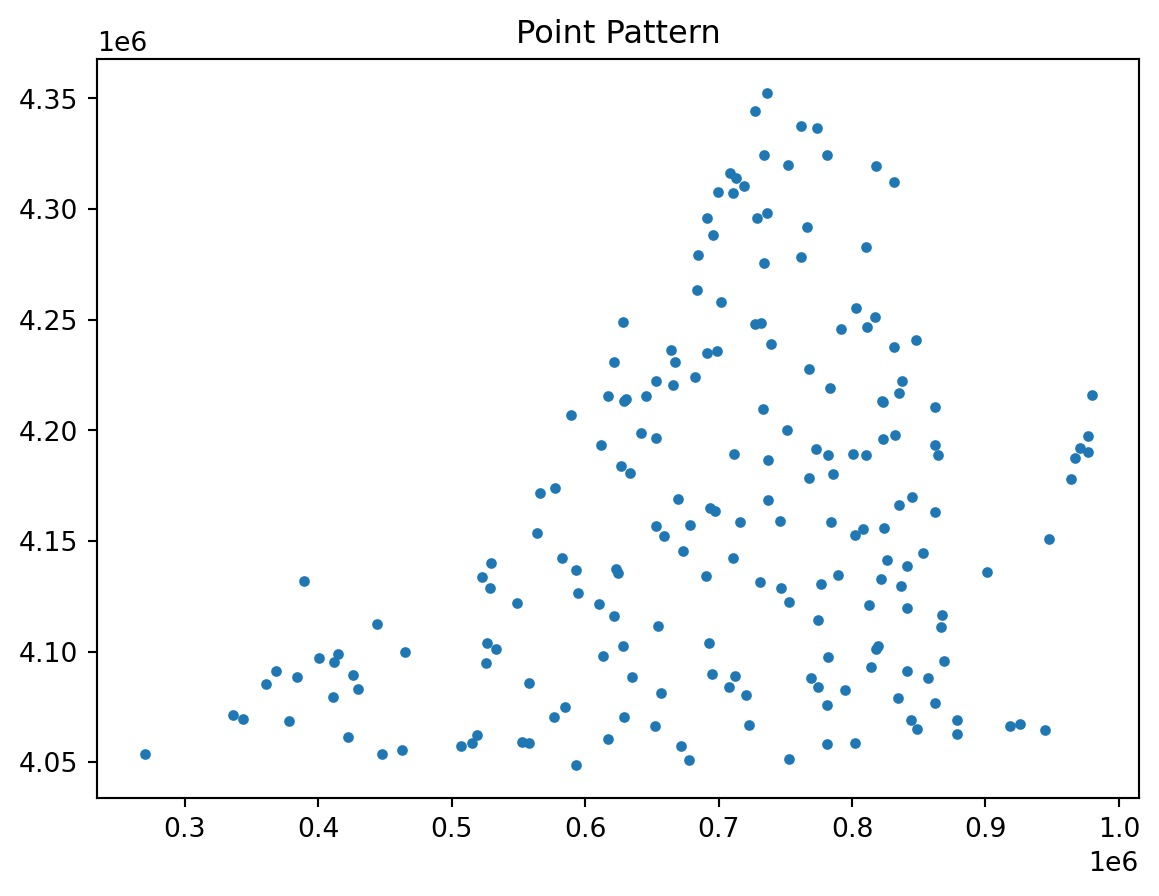

In [38]:
pp_csr.plot()

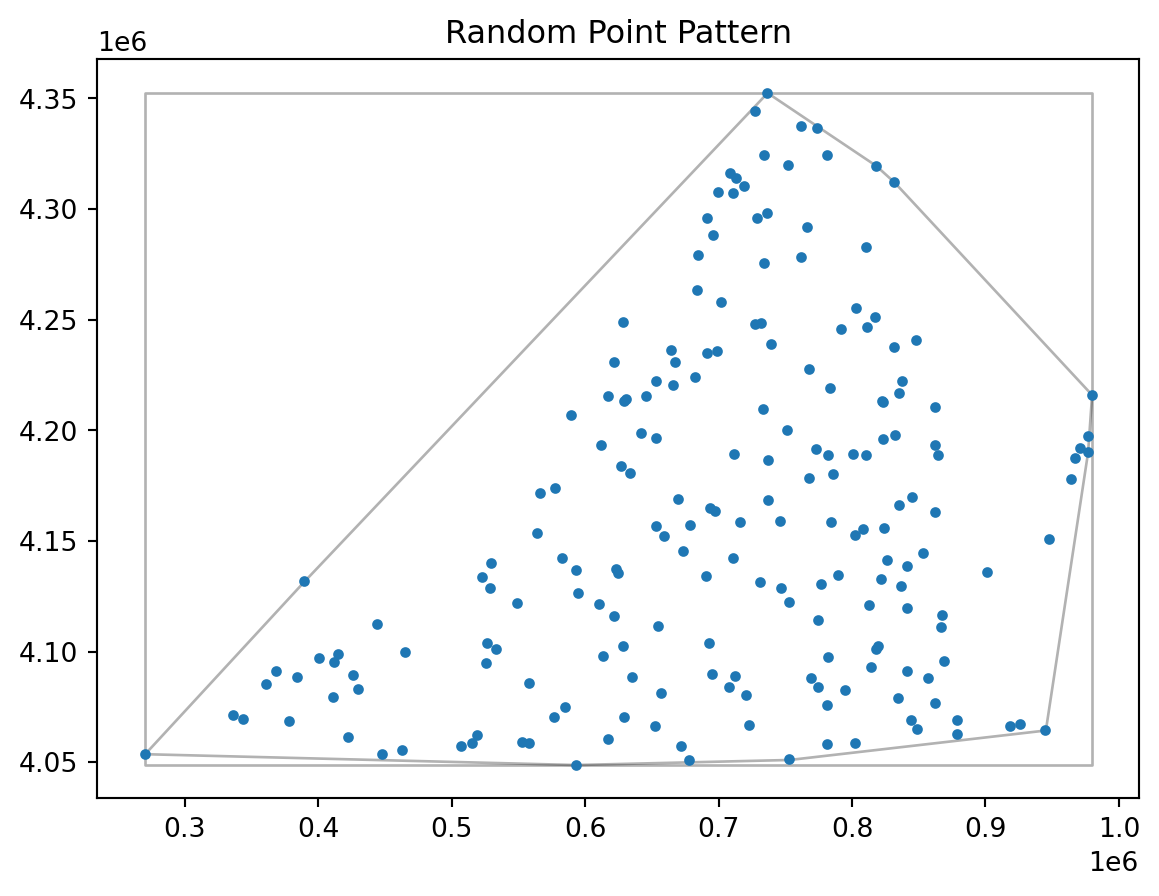

In [39]:
pp_csr.plot(window=True, hull=True, title='Random Point Pattern')

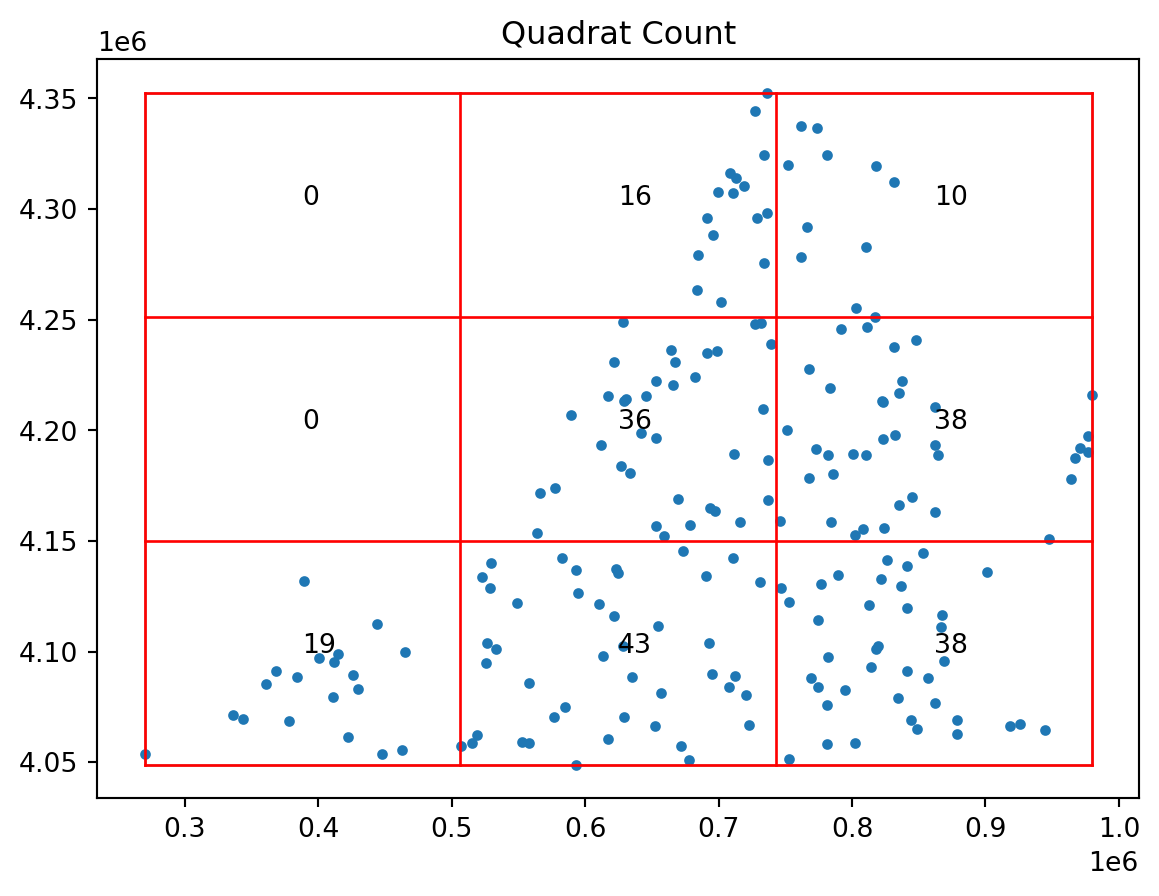

In [41]:
csr_qr = qs.QStatistic(pp_csr, shape='rectangle', nx=3, ny=3)
csr_qr.plot()

In [42]:
csr_qr.chi2_pvalue

7.295335713511762e-19